## Week 4 Individual Assignment
# Mapping Land Use and zoning in San Francisco (2015)

For this week's homework assignment, I will be mapping certain land uses in San Francisco as a categorical variables impacting public health and asmtha rates in the city. The data I am using is a GeoJSON file of the 2015 Zoning Map from the SF Data Portal. I decided to use the map from 2015 because our group is using data on asmtha rates and poverty levels that is based on the 2010 Census. The California Department for Housing and Community Development requires jurisdictions update their Land Use and Housing Elements on specific planning cycles. On July 18, 2013, the ABAG (Association for Bay Area Governments) issued the final RHNA allocations to jurisdictions with the deadline of having their updated housing elements approved by HCD by January 31, 2015. SF's 2014 Housing Element was approved on May 29, 2015. As such, I've used the 2015 zoning map to compare against asthma and health insurance data from the 2010 census. 

My group plans to use the outputs of this assignment to 
Make land use map interactive to isolate different land uses - esp industrial
trying to over lay the different zones onto census tracts for comparison to asthma rates and historic redline maps.

In [2]:
#importing libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [4]:
#loading the 2015 Zoning Maps' GeoJSON data file as geopandas
df = gpd.read_file('data/SFZoningDistricts_Jan2015.geojson')

# Inspecting and Cleaning Up the Data

In [5]:
#inspecting the shape of the file
df.shape

(9978, 7)

In [6]:
df.head()

,zoning_sim,districtna,shape_area,url,multigeom,shape_len,geometry
0,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",13901.1426915,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,552.715581654,"POLYGON ((-122.39202 37.73010, -122.39207 37.7..."
1,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",11413.2653614,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,602.155213139,"POLYGON ((-122.39165 37.73087, -122.39172 37.7..."
2,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",14482.4919657,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,607.84767868,"POLYGON ((-122.39134 37.73169, -122.39144 37.7..."
3,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",54869.3000022,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,1524.97422258,"POLYGON ((-122.39187 37.73195, -122.39190 37.7..."
4,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",12643.7618017,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,478.416741548,"POLYGON ((-122.39103 37.73262, -122.39113 37.7..."


In [7]:
# Looking at the data types
df.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   zoning_sim  9978 non-null   object  
 1   districtna  9978 non-null   object  
 2   shape_area  9978 non-null   object  
 3   url         9909 non-null   object  
 4   multigeom   9978 non-null   object  
 5   shape_len   9978 non-null   object  
 6   geometry    9978 non-null   geometry
dtypes: geometry(1), object(6)
memory usage: 545.8+ KB


In [8]:
# Defining the columns to keep (zoning district name, zoning use abbreviation, area, and geometry).
columns_to_keep = ['districtna',
                   'zoning_sim',
                   'shape_area',
                   'geometry']

In [9]:
# Adding these columns to a new dataframe
df2 = df[columns_to_keep].copy()
df2

,districtna,zoning_sim,shape_area,geometry
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7..."
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7..."
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7..."
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7..."
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7..."
...,...,...,...,...
9973,EXCELSIOR OUTER MISSION NCD,NCD,15828.0104436,"POLYGON ((-122.44363 37.71318, -122.44378 37.7..."
9974,EXCELSIOR OUTER MISSION NCD,NCD,24179.2035499,"POLYGON ((-122.44272 37.71374, -122.44280 37.7..."
9975,EXCELSIOR OUTER MISSION NCD,NCD,31868.2001932,"POLYGON ((-122.44368 37.71379, -122.44374 37.7..."
9976,EXCELSIOR OUTER MISSION NCD,NCD,23104.3156526,"POLYGON ((-122.44230 37.71451, -122.44238 37.7..."


In [10]:
# Renaming the columns. 
df2.columns = ['ZoningDistrict',
               'ZoningCode',
               'Area',
               'geometry']

In [11]:
#Checking to make sure the column names were updated correctly.
df2.head()

,ZoningDistrict,ZoningCode,Area,geometry
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7..."
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7..."
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7..."
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7..."
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7..."


In [12]:
# I want to see the number of different types of zoning districts there are in San Francisco 
df2['ZoningDistrict'].value_counts()

RESIDENTIAL- HOUSE, ONE FAMILY                 1949
RESIDENTIAL- HOUSE, TWO FAMILY                 1514
PUBLIC                                          814
RESIDENTIAL- MIXED, LOW DENSITY                 750
RESIDENTIAL- HOUSE, THREE FAMILY                661
                                               ... 
RESIDENTIAL - MIXED, LOW DENSITY                  1
PARKMERCED-COMMUNITY/FITNESS                      1
HEAVY COMMERCIAL                                  1
UPPER MARKET STREET NEIGHBORHOOD COMMERCIAL       1
PARKMERCED-SCHOOL                                 1
Name: ZoningDistrict, Length: 96, dtype: int64

In [59]:
# adding a 'color' and 'use' column to help color code the forthcoming maps
df2['color'] = ''
df2['use'] = ''

In [60]:
#setting the color of the land uses I'm interested in focusing on (industrial and Hunter's Point)

df2.loc[df2['ZoningCode'] == 'M-1', 'color'] = 'purple'
df2.loc[df2['ZoningCode'] == 'M-1', 'use'] = 'Industrial'
df2.loc[df2['ZoningCode'] == 'M-2', 'color'] = 'purple'
df2.loc[df2['ZoningCode'] == 'M-2', 'use'] = 'Industrial'
df2.loc[df2['ZoningCode'] == 'HP-RA', 'color'] = 'red'
df2.loc[df2['ZoningCode'] == 'HP-RA', 'use'] = 'Hunters Point'
df2.loc[df2['ZoningCode'] == 'PM-OS', 'color'] = 'green'
df2.loc[df2['ZoningCode'] == 'PM-OS', 'use'] = 'Open Space'
df2.loc[df2['ZoningCode'] == 'P', 'color'] = 'grey'
df2.loc[df2['ZoningCode'] == 'P', 'use'] = 'Public'

In [61]:
# fillng the color column for all other zones as No data
df2['color'].fillna(value='NoData', inplace=True)
df2['use'].fillna(value='Other', inplace=True)
df2.head()

,ZoningDistrict,ZoningCode,Area,geometry,color,use,Colors,tone
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7...",,,NaN,
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7...",,,NaN,
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7...",,,NaN,
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7...",,,NaN,
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7...",,,NaN,


In [62]:
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ZoningDistrict  9978 non-null   object  
 1   ZoningCode      9978 non-null   object  
 2   Area            9978 non-null   object  
 3   geometry        9978 non-null   geometry
 4   color           9978 non-null   object  
 5   use             9978 non-null   object  
 6   Colors          957 non-null    object  
 7   tone            9978 non-null   object  
dtypes: geometry(1), object(7)
memory usage: 623.8+ KB


In [38]:
# creating a color dictionary to color code the map

color_dict = {'Industrial': 'purple',
              'Hunters Point': 'red',
              'Open Space': 'green',
              'Public': 'orange',
              'NoData': 'grey'}


In [18]:
# creating a new data frame for these focused land uses
df3 = df2[(df2['ZoningCode'] == 'M-2') | (df2['ZoningCode']=='M-1') | (df2['ZoningCode']=='HP-RA')]
df3.head()

,ZoningDistrict,ZoningCode,Area,geometry,color
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7...",purple
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7...",purple
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7...",purple
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7...",purple
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7...",purple


<AxesSubplot: >

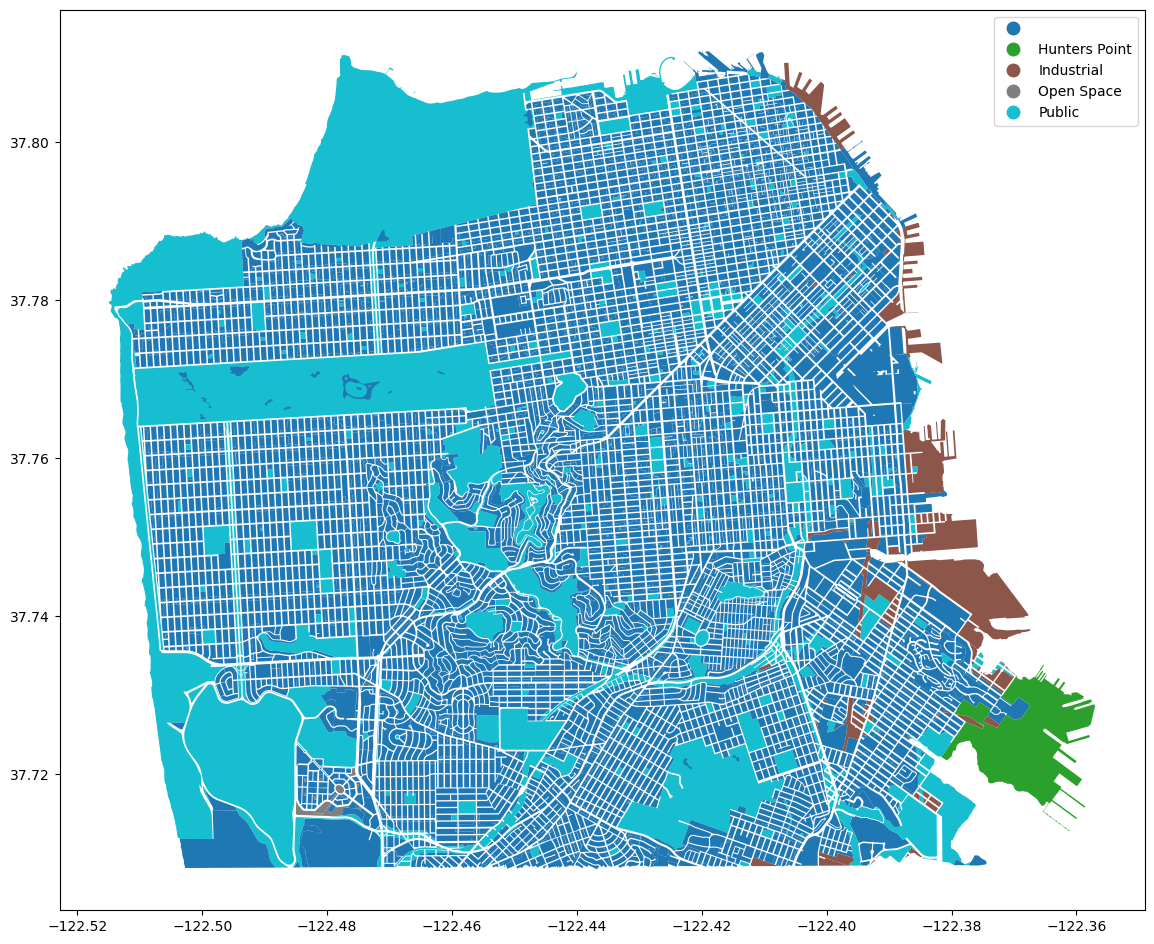

In [65]:
df2.plot(
            figsize=(14,12),   # determines the size of the plot 
            column = 'use',   # column that defines the color of the dots
            legend = True,     # adds a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this places the legend on the side
) 

<AxesSubplot: >

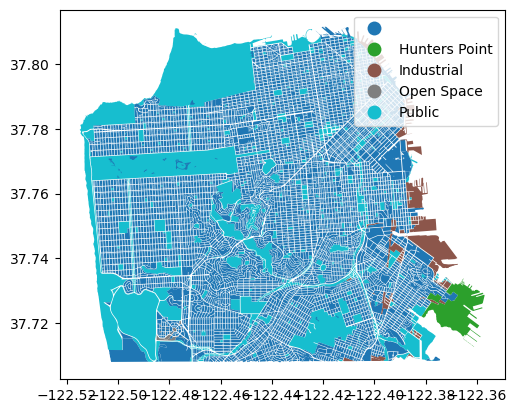

In [37]:
df2.plot("use", legend = True)

In [23]:
# Mapping with Maptplotly

import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [24]:
df2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
# color coding the map - creating a key
keys = list(df2['ZoningCode'].unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = df2['color']
color_dict = dict(zip(keys, colors))
color_dict['NoData'] = 'lightgray'

In [49]:
# preparing the grid
row_count = df3['ZoningCode'].nunique()

In [50]:
ax_list = []

In [51]:
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))

In [52]:
ax_string = ', '.join(ax_list)

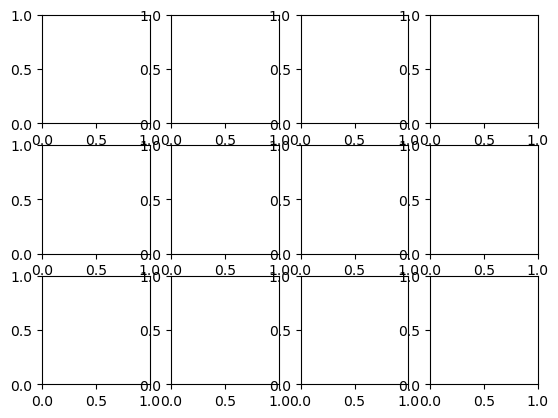

In [53]:
fig, (ax_string) = plt.subplots(row_count, 4)

KeyError: ''

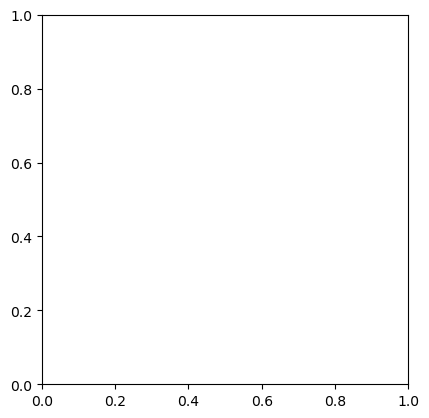

In [58]:
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=3)
for index, row in df2.iterrows():
    plot = df2[df2['ZoningCode'] == row['ZoningCode']].plot(color=color_dict[row.color], ax=ax1)
ax1.axis('off')

# Focusing in on Specific Land Uses:

For our project, we are most interested in looking at the land uses with inherent risk to public health such as Industry, Production, Distribution, and Repair, and the Hunter's Point Redevelopment District.

In [11]:
# I'm running a query to see how many Light Industrial Zones (M-1) exist in San Francisco.

df2[df2['ZoningCode']=='M-1'] #M-1 Light Industrial

,ZoningDistrict,ZoningCode,Area,geometry
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7..."
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7..."
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7..."
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7..."
443,LIGHT INDUSTRIAL,M-1,533.756396874,"POLYGON ((-122.39426 37.74373, -122.39432 37.7..."
...,...,...,...,...
8578,LIGHT INDUSTRIAL,M-1,7492.45535673,"POLYGON ((-122.38844 37.74001, -122.38885 37.7..."
8579,LIGHT INDUSTRIAL,M-1,111907.966555,"POLYGON ((-122.38928 37.73937, -122.38942 37.7..."
8580,LIGHT INDUSTRIAL,M-1,90951.5975165,"POLYGON ((-122.38912 37.73980, -122.38915 37.7..."
8581,LIGHT INDUSTRIAL,M-1,70963.257074,"POLYGON ((-122.38882 37.74066, -122.38887 37.7..."


In [12]:
#Saving this subset as a new dataframe (m1)
m1 = df2[df2.ZoningCode =='M-1']

<AxesSubplot: >

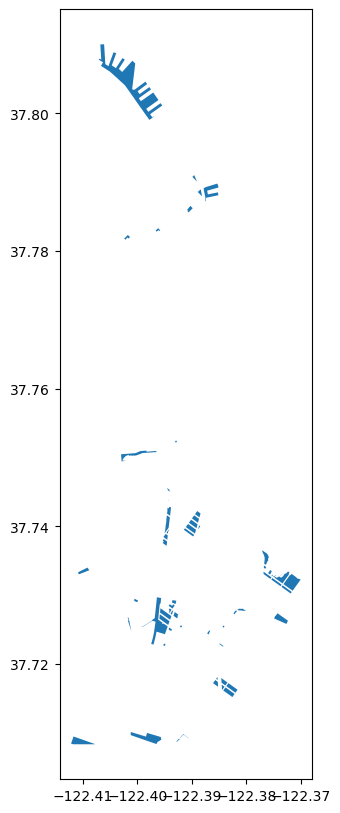

In [13]:
#Plotting the M-1 Light Industrial Zones
m1.plot(figsize=(12,10))

In [14]:
# I'm now running the same query but for Heavy Industrial Zones (M-2)
df2[df2['ZoningCode']=='M-2'] #M-2 Heavy Industrial

,ZoningDistrict,ZoningCode,Area,geometry
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7..."
449,HEAVY INDUSTRIAL,M-2,10915.7027815,"POLYGON ((-122.38705 37.70959, -122.38733 37.7..."
461,HEAVY INDUSTRIAL,M-2,2217.87888584,"POLYGON ((-122.38908 37.70918, -122.38847 37.7..."
462,HEAVY INDUSTRIAL,M-2,2091.31149466,"POLYGON ((-122.38788 37.70885, -122.38793 37.7..."
463,HEAVY INDUSTRIAL,M-2,289051.281626,"POLYGON ((-122.40123 37.70947, -122.40026 37.7..."
464,HEAVY INDUSTRIAL,M-2,3823.80677901,"POLYGON ((-122.39033 37.70930, -122.39038 37.7..."
529,HEAVY INDUSTRIAL,M-2,87138.8056897,"POLYGON ((-122.38548 37.71011, -122.38512 37.7..."
1744,HEAVY INDUSTRIAL,M-2,212.141631591,"POLYGON ((-122.38824 37.74886, -122.38814 37.7..."
1827,HEAVY INDUSTRIAL,M-2,189.704985145,"POLYGON ((-122.38649 37.74796, -122.38649 37.7..."
5300,HEAVY INDUSTRIAL,M-2,80667.1087102,"POLYGON ((-122.38393 37.75186, -122.38462 37.7..."


In [15]:
#Saving the M-2 Heavy Industrial Zones as a new dataframe (df2_M2)
m2=df2[df2['ZoningCode']=='M-2']

<AxesSubplot: >

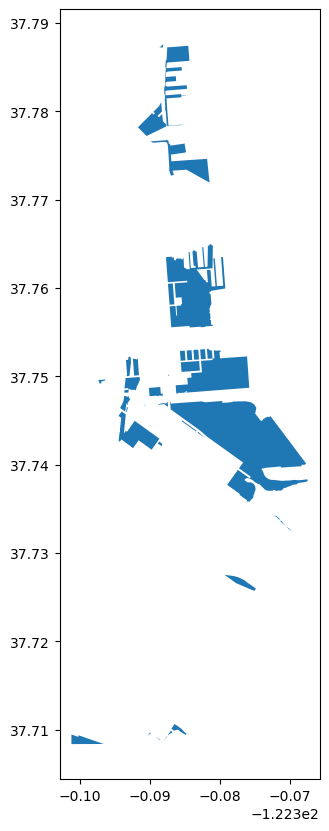

In [16]:
#Plotting the M-2 zones
m2.plot(figsize=(12,10))

In [17]:
#I'm joining the dataframes I created for the Light and Heavy Industrial zones to create one map of all industrial zone.
industrial = df2[(df2['ZoningCode'] == 'M-2') | (df2['ZoningCode']=='M-1')]

In [18]:
industrial.head()

,ZoningDistrict,ZoningCode,Area,geometry
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7..."
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7..."
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7..."
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7..."
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7..."


<AxesSubplot: >

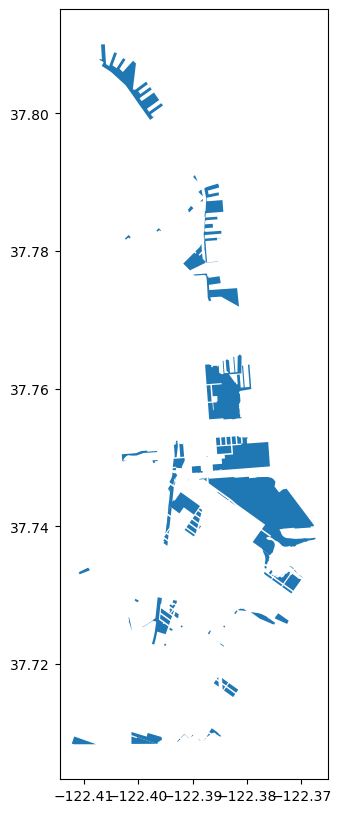

In [19]:
#Plotting the industrial zones
industrial.plot(figsize=(12,10))

# Hunter's Point Data:
Hunter's Point, a known superfund site in San Francisco, is an area of focus for our project for the inherent risk it poses to environmental public health in the city. It has it's own zoning district designated (HP-RA).

In [20]:
#Creating a new dataframe for the Hunter's Point district (HP-RA).
hp=df2[df2['ZoningCode']=='HP-RA']

<AxesSubplot: >

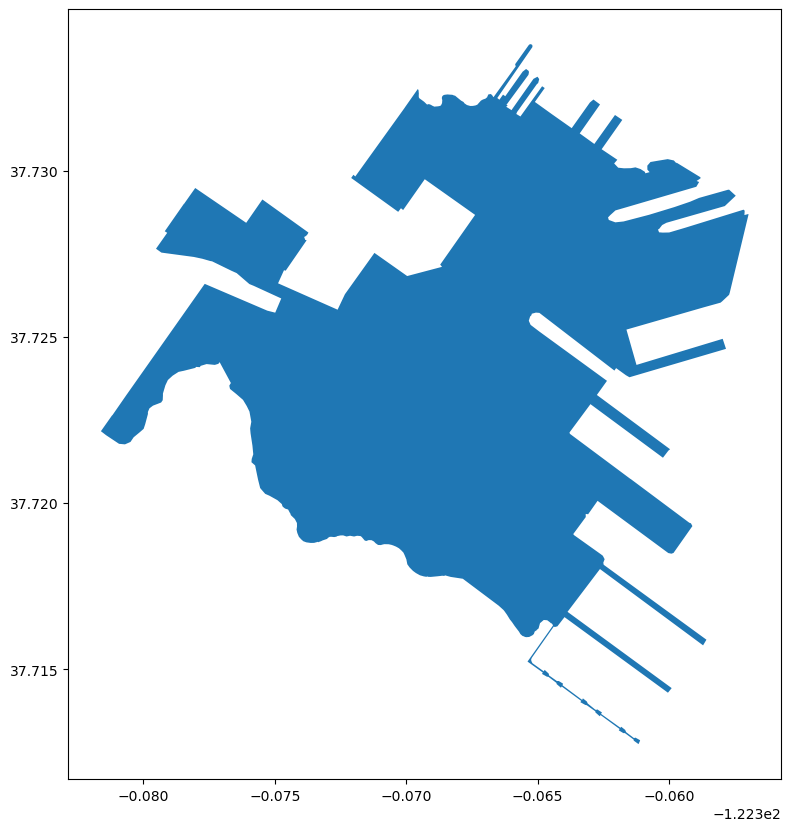

In [21]:
hp.plot(figsize=(12,10))

In [22]:
#Creating a new dataframe to combine the industrial zones with Hunter's Point
focus = df2[(df2['ZoningCode'] == 'M-2') | (df2['ZoningCode']=='M-1') | (df2['ZoningCode']=='HP-RA')]

In [23]:
focus.head()

,ZoningDistrict,ZoningCode,Area,geometry
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7..."
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7..."
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7..."
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7..."
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7..."


<AxesSubplot: >

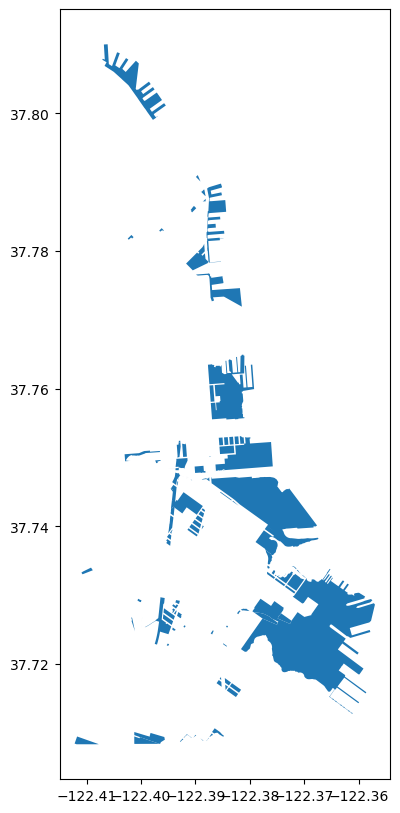

In [24]:
focus.plot(figsize=(12,10))

Folium

I'm going to import folium as the base map and then map these zones as an overlay.

In [25]:
import folium

In [26]:
m = folium.Map(location=[37.7,-122.4], 
               zoom_start = 11,
               tiles='CartoDB positron', 
               attribution='CartoDB')
m

In [87]:
# plot choropleth over the base map
folium.Choropleth(
                  geo_data=focus, # geo data
                  data=focus, # data          
                  columns=['ZoningCode'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.5, # line opacity (of the border)
                  legend_name='Indsurial Zones in San Francisco').add_to(m)    # name on the legend
m

IndexError: list index out of range

In [55]:
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [32]:
focus.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

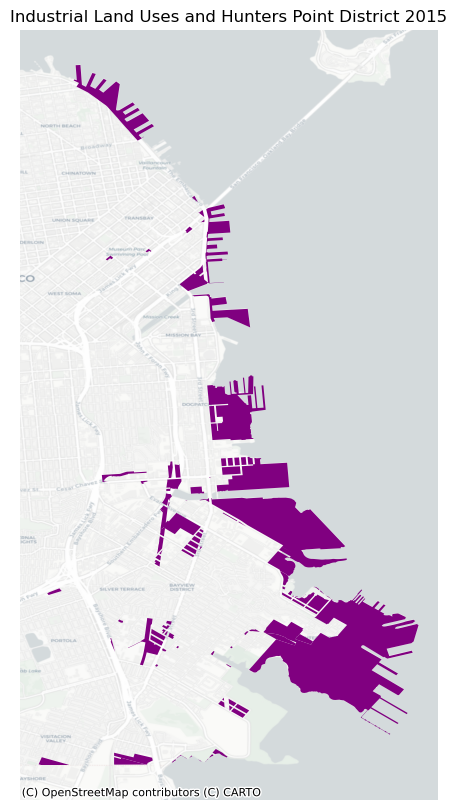

In [49]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,10))

#adding the data options
focus.plot(ax=ax,
           marker='ZoningCode',
           markersize=5,
           color='purple')

#turning off the axes
ax.axis('off')

#giving it a title
ax.set_title('Industrial Land Uses and Hunters Point District 2015')

#adding a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

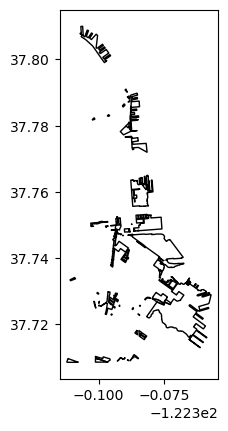

In [35]:
focus.plot(facecolor="none")

#adding basemap
ctx.add_basemap(ax, crs=4326)

In [37]:
# Color coding the different zones
focus['color'] = ''

In [38]:
focus.head()

,ZoningDistrict,ZoningCode,Area,geometry,color
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7...",
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7...",
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7...",
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7...",
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7...",


In [39]:
# setting the color for industrial zones (M-1 and M-2) to be purple
focus.loc[focus['ZoningCode'] == 'M-1', 'color'] = 'purple'
focus.loc[focus['ZoningCode'] == 'M-2', 'color'] = 'purple'

In [40]:
focus.head()

,ZoningDistrict,ZoningCode,Area,geometry,color
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7...",purple
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7...",purple
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7...",purple
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7...",purple
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7...",purple


In [41]:
# setting the color for Hunter's Point to be red
focus.loc[focus['ZoningCode'] == 'HP-RA', 'color'] = 'red'

In [42]:
focus.loc[focus['ZoningCode'] == 'HP-RA']

,ZoningDistrict,ZoningCode,Area,geometry,color
6505,SEE HUNTERS POINT REDEVELOPMENT PLAN,HP-RA,20924325.1837,"POLYGON ((-122.37547 37.72913, -122.37398 37.7...",red


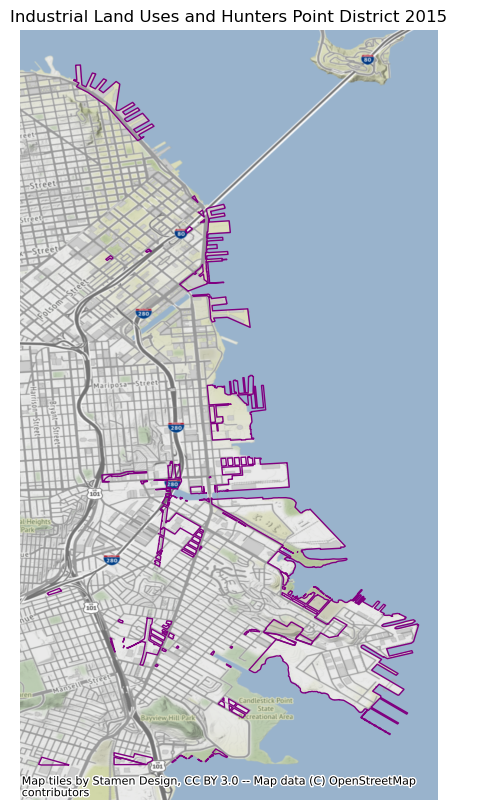

In [47]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,10))

#adding the data options
focus.plot(ax=ax,
           marker='ZoningCode',
           markersize=5,
           facecolor='none',
           edgecolor='purple')
           

#turning off the axes
ax.axis('off')

#giving it a title
ax.set_title('Industrial Land Uses and Hunters Point District 2015')

#adding a basemap
ctx.add_basemap(ax, crs=4326)

In [51]:
# color coding the map - creating a key
keys = list(focus['ZoningCode'].unique())

In [56]:
color_range = list(np.linspace(0,1, len(keys), endpoint=False))

In [70]:
colors = [focus['color']]

In [71]:
color_dict = dict(zip(keys, colors))

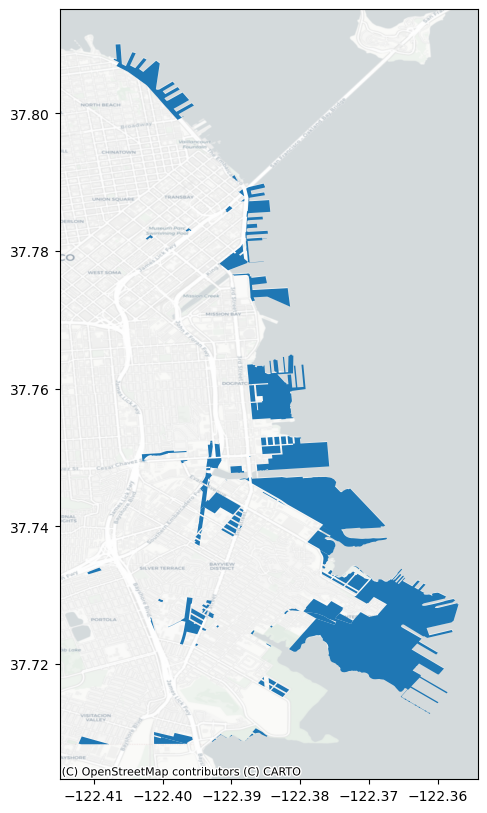

In [86]:
fig, ax = plt.subplots(figsize=(20,10))

#adding the data options
focus.plot(ax=ax,
           marker='ZoningCode',
           markersize=5)

#adding basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

In [72]:
#preparing the grid
row_count = focus['ZoningCode'].nunique()

In [73]:
ax_list = []

In [80]:
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))

In [82]:
ax_string = ', '.join(ax_list)

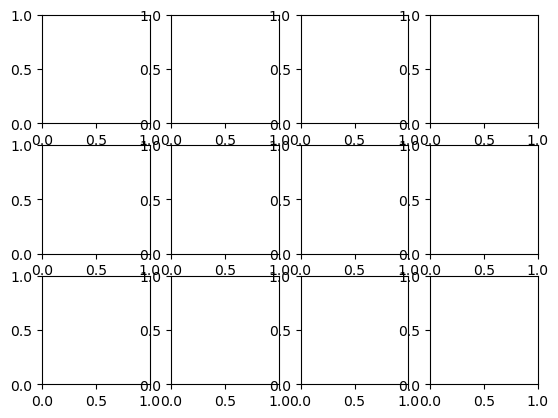

In [83]:
fig, (ax_string) = plt.subplots(row_count, 4)

KeyError: 'M-2'

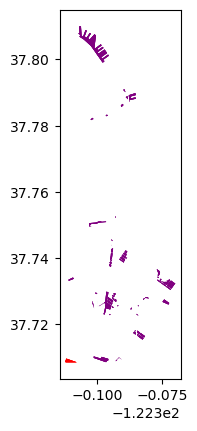

In [95]:
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=3)
for index, row in focus.iterrows():
    plot = focus[focus['ZoningCode'] == row['ZoningCode']].plot(color=color_dict[row['ZoningCode']], ax=ax1)
ax1.axis('off')

#adding basemap
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, crs=4326)